In [3]:
%connect

Testing ssh> ssh -oStrictHostKeyChecking=no -p 22 x3108c0s13b1n0 true
attempting to create tunnels from ipc@x3108c0s13b1n0 to ipc@x3108c0s13b1n0
starting ssh tunnel> ssh -oStrictHostKeyChecking=no -S none -nT -L /home/siramok/.config/bridge_kernel/flow_embedded_py_x3108c0s13b1n0-ipc-x3108c0s13b1n0:/home/siramok/.config/bridge_kernel/flow_embedded_py_x3108c0s13b1n0-ipc -p 22 x3108c0s13b1n0 sleep 30
waiting for local ipc socket - 5
connected to x3108c0s13b1n0
to disconnect: %disconnect


In [ ]:
# Read ascent data into a conduit node
data = conduit.Node()
data.set(ascent_data())
print(data)

no backend - use %connect


In [4]:
# Read the current render actions
with open('render_test.yaml', 'r') as file:
    yaml = file.read()
print(yaml)

-
  action: "add_pipelines"
  pipelines:
    pl1:
      f1:
        type: "composite_vector"
        params: 
          field1: "vel_x"
          field2: "vel_y"
          field3: "vel_z"
          output_name: "velocity"
      f2:
        type: "vector_magnitude"
        params: 
          field: "velocity"
          output_name: "vel_mag"
-
  action: "add_scenes"
  scenes:
    s1:
      plots:
        p1:
          type: "pseudocolor"
          field: "vel_mag"
          pipeline: "pl1"
        p2:
          type: "mesh"
      renders:
        r1:
          image_prefix: "vel_img"


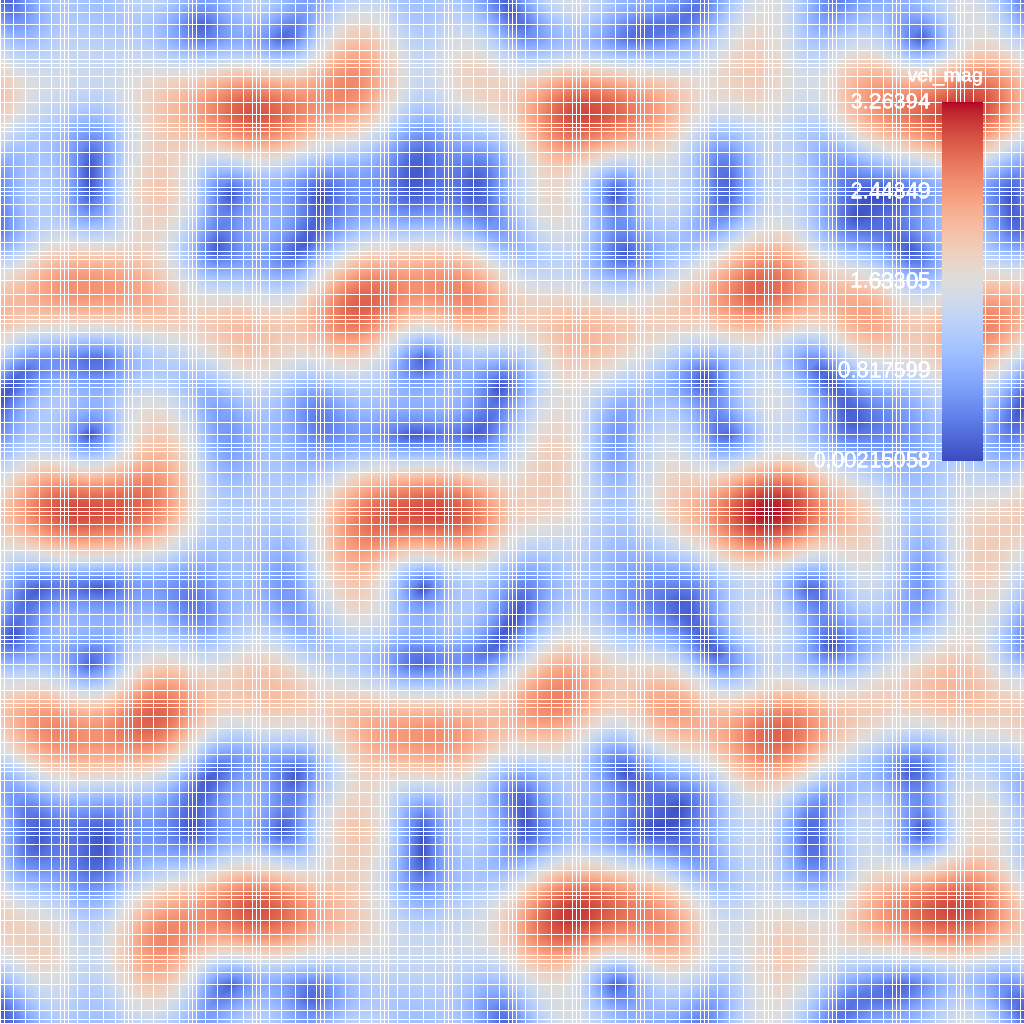

In [5]:
generated = conduit.Generator(yaml, "yaml")
actions = conduit.Node()
generated.walk(actions)

# Generate new renders
jupyter_ascent.execute(actions)

# View new renders within jupyter
info = conduit.Node()
jupyter_ascent.info(info)
display_images(info)

In [5]:
%disconnect